In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df=pd.read_csv(r'D:\endtoendml1\2015.csv')

In [45]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [46]:
print(df.shape)
print(df.columns)
print(df.info())

(158, 12)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom 

In [47]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

C:\Users\DHINESH\AppData\Local\Temp\ipykernel_4400\3913198610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness Score', y='Country', data=top_countries, palette='viridis')


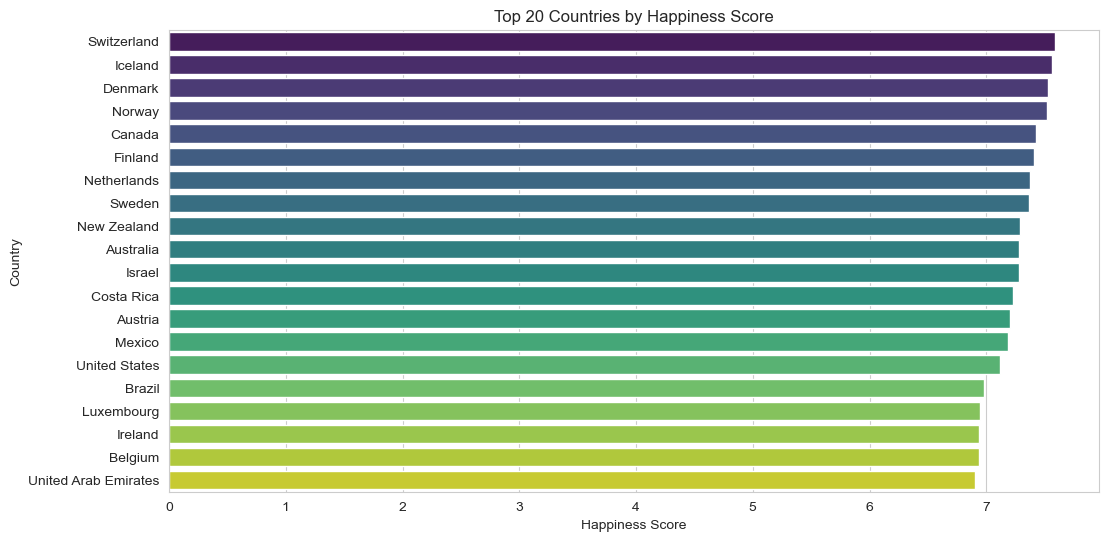

In [80]:
top_countries = df[['Country', 'Happiness Score']].sort_values(by='Happiness Score', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x='Happiness Score', y='Country', data=top_countries, palette='viridis')
plt.title('Top 20 Countries by Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

C:\Users\DHINESH\AppData\Local\Temp\ipykernel_4400\1179858706.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trust (Government Corruption)', y='Country', data=top_trust, palette='viridis')


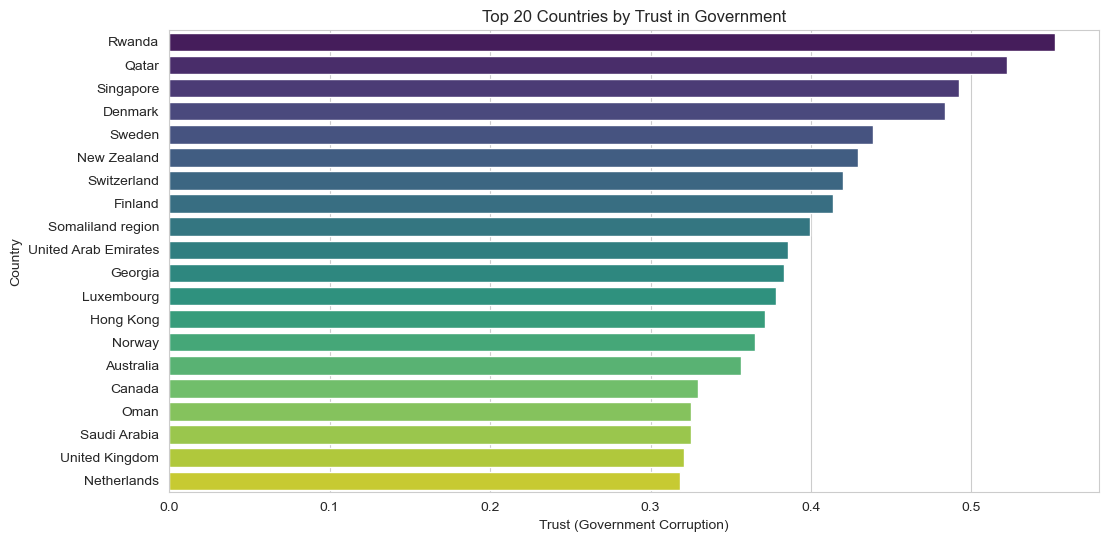

In [79]:
top_trust = df[['Country', 'Trust (Government Corruption)']].sort_values(
    by='Trust (Government Corruption)', ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x='Trust (Government Corruption)', y='Country', data=top_trust, palette='viridis')
plt.title('Top 20 Countries by Trust in Government')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Country')
plt.show()

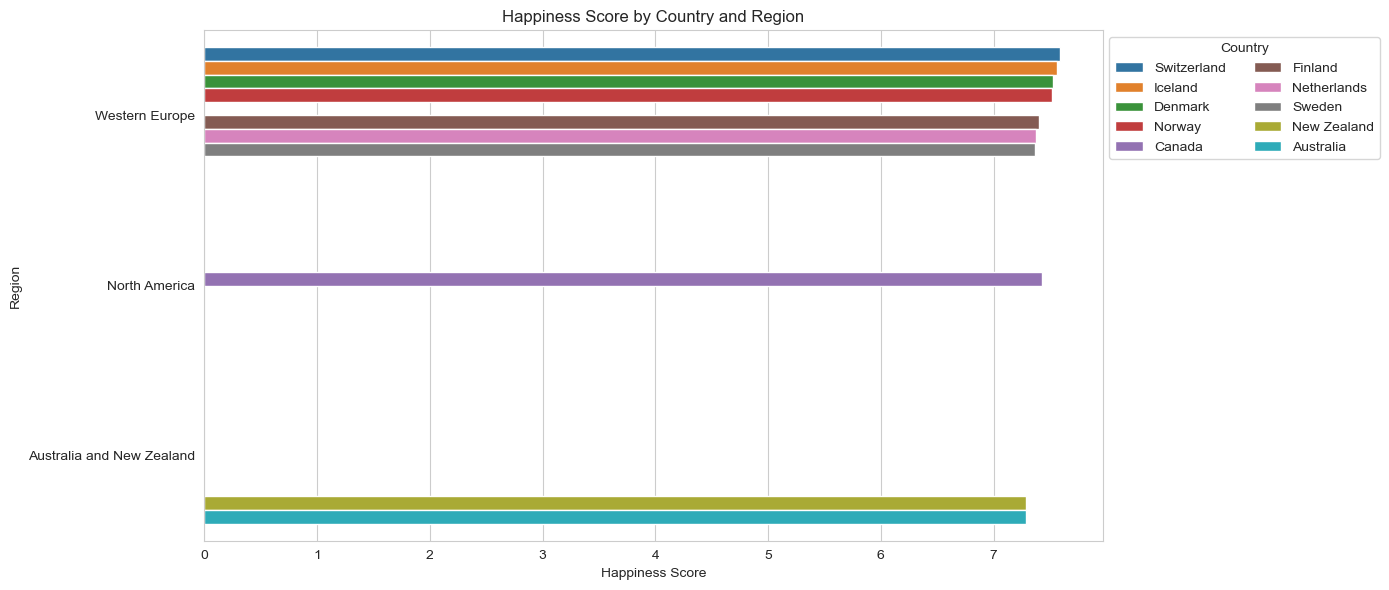

In [78]:
plt.figure(figsize=(14,6))
sns.barplot(x='Happiness Score', y='Region', hue='Country', data=df.head(10))
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.xlabel("Happiness Score")
plt.ylabel("Region")
plt.title("Happiness Score by Country and Region")
plt.tight_layout()
plt.show()


In [ ]:
num_cols = df.select_dtypes(include='number').columns

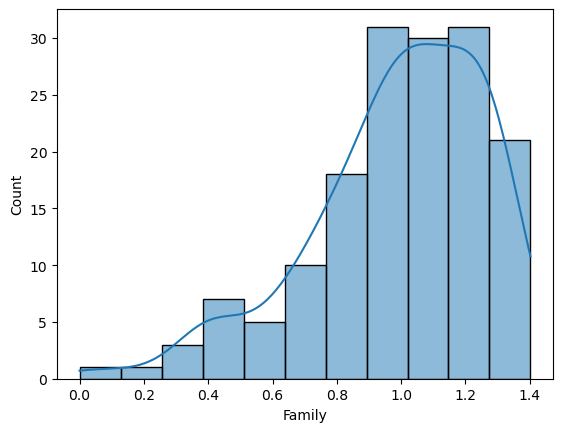

In [ ]:
sns.histplot(df['Family'],kde=True)
plt.show()

In [ ]:
df[num_cols].skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
cols = ['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family',
        'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
        'Generosity', 'Dystopia Residual']
df[cols]= pt.fit_transform(df[cols])

In [ ]:
df[cols].skew()

Happiness Rank                  -0.264365
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

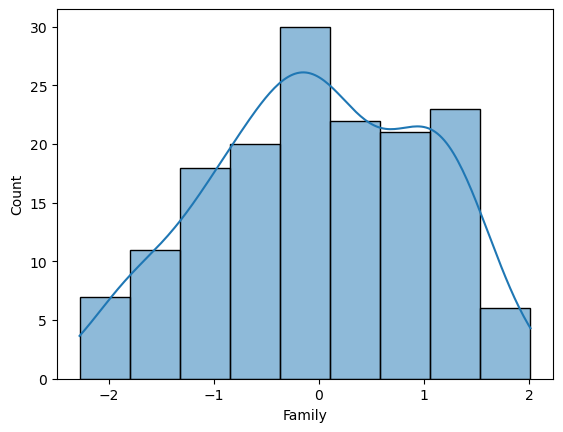

In [ ]:
sns.histplot(df['Family'],kde=True)
plt.show()

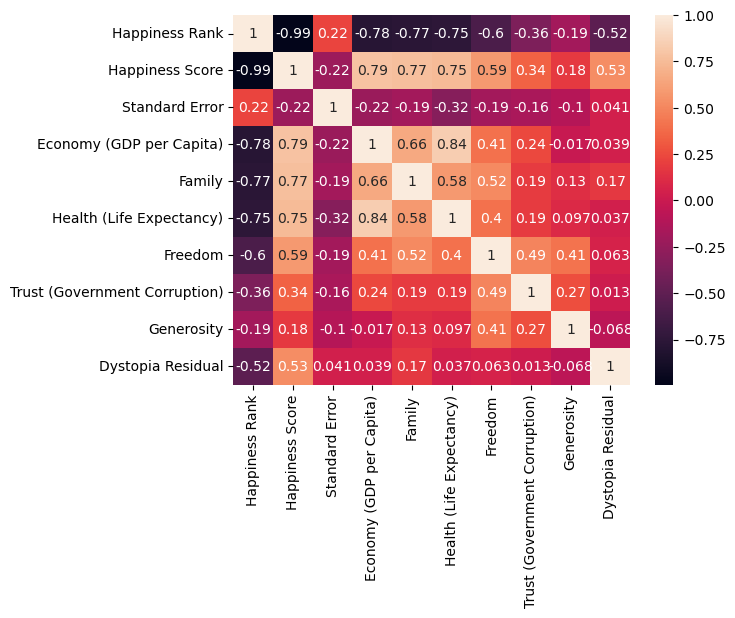

In [ ]:
corr=df[num_cols].corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
X=df[['Happiness Rank','Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
y=df['Happiness Score']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
models = {
    "LinearRegression": LinearRegression(),
    "Ridge Regression": RidgeCV(),
    "Lasso Regression": LassoCV(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor()
}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")



LinearRegression
R² Score: 0.9903
MSE: 0.0138
RMSE: 0.1173

Ridge Regression
R² Score: 0.9904
MSE: 0.0136
RMSE: 0.1167

Lasso Regression
R² Score: 0.9901
MSE: 0.0140
RMSE: 0.1185

Decision Tree
R² Score: 0.9964
MSE: 0.0051
RMSE: 0.0715

Random Forest
R² Score: 0.9979
MSE: 0.0029
RMSE: 0.0540

Gradient Boosting
R² Score: 0.9991
MSE: 0.0013
RMSE: 0.0366

Support Vector Regressor
R² Score: 0.9612
MSE: 0.0550
RMSE: 0.2346

KNN Regressor
R² Score: 0.9292
MSE: 0.1005
RMSE: 0.3170

XGBRegressor
R² Score: 0.9969
MSE: 0.0043
RMSE: 0.0658


In [ ]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(models, open('models.pkl', 'wb'))